<a href="https://colab.research.google.com/github/mayank1729/Machine-Learning-Reloaded/blob/master/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

In [4]:
#Import dataset
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Position_Salaries.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


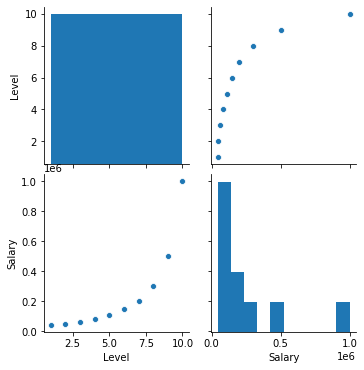

In [31]:
sns.pairplot(df)

In [7]:
X = df.iloc[:,1].values
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
#Reshaping X to make it a 2D array
X = X.reshape(-1,1)
X.shape

(10, 1)

In [9]:
Y = df.iloc[:,-1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [15]:
Y = Y.reshape(-1,1)
Y.shape

(10, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=0)

In [0]:
#Applying feature scaling here
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
X_train

array([[-0.13271219],
       [ 1.63678363],
       [-1.19440968],
       [ 0.57508614],
       [ 0.92898531],
       [-0.48661135],
       [-1.54830884],
       [ 0.22118698]])

In [19]:
X_test

array([[-0.84051051],
       [ 1.28288447]])

In [0]:
sc_Y = StandardScaler()
Y_train = sc_Y.fit_transform(Y_train)
Y_test = sc_Y.transform(Y_test)

In [21]:
Y_train

array([[-0.44345056],
       [ 2.54931528],
       [-0.64521005],
       [-0.14081131],
       [ 0.19545451],
       [-0.5443303 ],
       [-0.66202334],
       [-0.30894423]])

In [22]:
Y_test

array([[-0.61158347],
       [ 0.86798616]])

In [24]:
#Training the model

#Applying the rbf kernel
from sklearn.svm import SVR
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
Y_pred = sc_Y.inverse_transform(regressor_rbf.predict(X_test))
Y_pred

array([ 87448.7742002 , 437130.30222969])

In [27]:
#Applying the polynomial kernel
regressor_poly = SVR(kernel='poly')
regressor_poly.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
Y_pred = sc_Y.inverse_transform(regressor_poly.predict(X_test))
Y_pred

array([131027.26913552, 400927.72398059])

In [30]:
sc_Y.inverse_transform(Y_test)

array([[ 60000.],
       [500000.]])

#Plotting the graphs for both the kernels


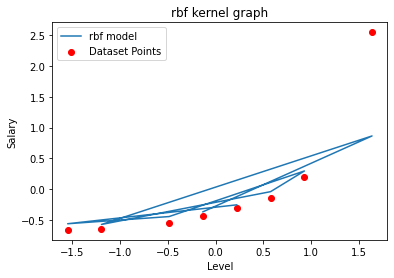

In [43]:
#rbf kernel
plt.scatter(X_train,Y_train,label="Dataset Points",color='r')
plt.xlabel('Level')
plt.ylabel("Salary")
plt.title("rbf kernel graph")
plt.plot(X_train,regressor_rbf.predict(X_train),label='rbf model')
plt.legend()

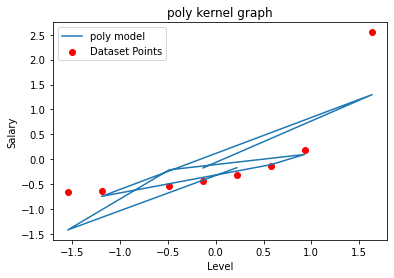

In [42]:
#rbf kernel
plt.scatter(X_train,Y_train,label="Dataset Points",color='r')
plt.xlabel('Level')
plt.ylabel("Salary")
plt.title("poly kernel graph")
plt.plot(X_train,regressor_poly.predict(X_train),label='poly model')
plt.legend()

#Building plots with higher resolution

Text(0, 0.5, 'Salary')

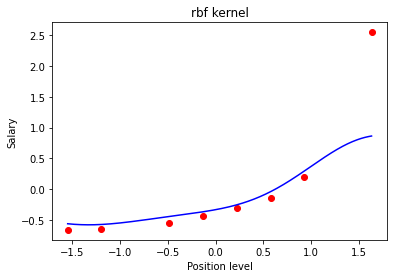

In [44]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_grid, regressor_rbf.predict(X_grid), color = 'blue')
plt.title('rbf kernel')
plt.xlabel('Position level')
plt.ylabel('Salary')


Text(0, 0.5, 'Salary')

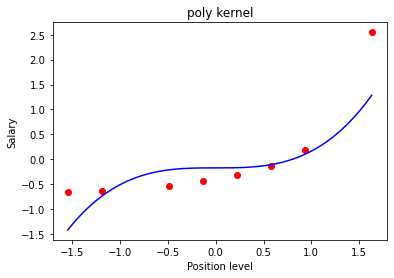

In [45]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_grid, regressor_poly.predict(X_grid), color = 'blue')
plt.title('poly kernel')
plt.xlabel('Position level')
plt.ylabel('Salary')
